# Intelligent Systems 2022: Practical Assignment No 1

This is the first assignment for Intelligent Systems. Since we are only starting, we will try to keep it short and will try to get you familiar with some basic data structures and will have a first look at search algorithms.



## Graphs, Trees, and a bit of Search

Your name: Chantal Elena Ariu

Your VUNetID: car103

If you do not provide your name and VUNetID we will not accept your submission. 

### Learning objectives

At the end of this exercise you should be able to understand basic ideas on how to represent graphs and trees in python. Furthermore, we will have a look into search algorithms in trees.

1. Understanding graph datastructures
2. Make small modifications of the code to implement a tree datastructure
3. Modify a tree search algorithm

### Practicalities

Follow this Notebook step-by-step. 

Of course, you can do the exercises in any Programming Editor of your liking. 
But you do not have to. Feel free to simply write code in the Notebook. Please use your studentID+Assignment1.ipynb as the name of the Notebook.  

Note: Unlike the courses dedicated to programming we will not evaluate the style of the programs. But we will, however, test your programs on other data that we provide, and your program should give the correct output to the test-data as well.

As was mentioned, the assignment is graded as pass/fail. To pass you need to have either a full working code or an explanation of what you tried and what didn't work for the tasks that you were unable to complete (you can use multi-line comments or a text cell).

## Initialising 

First, let us make sure the necessary packages are installed, and imported. Run the following code:

In [37]:
import sys
!{sys.executable} -m pip install numpy
!{sys.executable} -m pip install networkx
!{sys.executable} -m pip install decorator==5.0.9
!{sys.executable} -m pip install matplotlib
import datetime
import numpy as np
from numpy import random


# This might produce a warning that numpy is already installed. 


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python3.11 -m pip install --upgrade pip

[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python3.11 -m pip install --upgrade pip

[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python3.11 -m pip install --upgrade pip

[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python3.11 -m pip install --upgrade pip


## Representing Graphs in Python



<img src="graph.png" width="300"/>


### Graph with Dictionaries

#### Task 1
Represent the graph from the figure as in a Python dictionary and describe your datastructure.

In [38]:
# Write your code here
from typing import Dict, List

adjacency_list: Dict[str, List[str]] = {
    "a": ["b"],
    "b": ["a", "c", "d"],
    "c": ["b", "d", "f", "e"],
    "d": ["b", "c"],
    "e": ["c"],
    "f": ["c"]
}


In [39]:
dict_graph_explanation = """
In order to represent the given graph in a dictionary, I chose to use
the following datastructure: adjacency list.

Dictionaries have keys corresponding values. 
In an adjacency list, each key represents a vertex which then has a value 
mapped to it, specifically a list of directly neighboring vertices.
For example, looking at the graph, the vertex 'b' has 3 directly neighboring
vertices, 'a', 'c', and 'd'. In an adjacency list this would therefore mean that 
the key 'b' is mapped to the value ['a', 'c', 'd']
"""

### Graph with Adjacency Matrices

As mentioned in the working groups and the 1st working group exercise sheet, you can represent graphs also as adjancency matrices with 0 and 1. This is a standard format for representing graphs that we therefore will also explore practically.


#### Task 2
Come up with your own adjacency matrix representation for the graph from above in Python.
Then describe what you did in a couple of sentences.

In [40]:
# Write your adjacency matrix code here
# 0 = a, 1 = b, 2 = c, 3 = d, 4 = e, 5 = f

# Create a 6x6 adjacency matrix initialized with zeros
num_vertices = 6
adjacency_matrix: List[List[int]] = [[0] * num_vertices for _ in range(num_vertices)]


vertex_map: Dict[str, int] = {}

count = 0
for key, value in adjacency_list.items(): # Map 'a' to 0, 'b' to 1, and so on
    vertex_map[key] = count
    count += 1

for vertex, neighbors in adjacency_list.items():
    vertex_int: int = vertex_map[vertex]  
    for neighbor in neighbors:
        neighbor_index = vertex_map[neighbor]
        adjacency_matrix[vertex_int][neighbor_index] = 1

# Printing the adjacency matrix
for row in adjacency_matrix:
    print(row)

[0, 1, 0, 0, 0, 0]
[1, 0, 1, 1, 0, 0]
[0, 1, 0, 1, 1, 1]
[0, 1, 1, 0, 0, 0]
[0, 0, 1, 0, 0, 0]
[0, 0, 1, 0, 0, 0]


In [41]:

adj_graph_explanation = """
In order to create an adjacency matrix I first initialized the variable num_vertices to
6 since there are a total of 6 nodes in the graph that I want to represent. Then I created 
a list of lists (my matrix) that is 6x6 (num_vertices) large with only zeroes, since it will serve as the 
initial state of no connections between nodes being expressed yet. This empty matrix will be used to represent
the graph and is therefore also initialized to adjacency_matrix.

I then created an empty dictionary (vertix_map) which will store the vertices alphabetically as keys and numerically
as each corresponding value to its key.

Then, using a nested for loop, I first iterate through every item in the adjacency list and store the vertices (a, b, c,...)
in the variable vertex_int which I get using the vertex_map dictionary. Basically, each alphabetic vertex has an integer 
mapped to it in vertex_map, and during vertex_int = vertex_map[vertex] the integer of each alphabetic vertex will be stored
in that variable.
For each iteration of that process, a second for loop is called which iterates over the list of neighbors (obtained from first for loop) 
of each vertex and then updates the adjacency_matrix for each neighbor and its connecting vertex. So whenever there is a connection,
the 0 from the initial state of the matrix will be turned into a 1 to represent a connection.

My result is more easily visualized using the following annotation:
#    a  b  c  d  e  f
# a [0, 1, 0, 0, 0, 0]
# b [1, 0, 1, 1, 0, 0]
# c [0, 1, 0, 1, 1, 1]
# d [0, 1, 1, 0, 0, 0]
# e [0, 0, 1, 0, 0, 0]
# f [0, 0, 1, 0, 0, 0]

So now we can see that, indeed, 'b' has a connection with 'a', 'c', and 'd'
"""



## Representing Trees in Python

As for many abstract datastructures, there is many ways on how to represent them in Python. In this tasks, we will have a look at some helpful representations for graphs and trees. 
There are actually many more that you will encounter throughout your studies, because graphs and trees are maybe the most important data structures in AI and computer science.


### Binary Trees

In [44]:
class Node:
    def __init__(self, val):
        self.left = None
        self.right = None
        self.value = val

class Tree:
    def __init__(self):
        self.root = None

    def getRoot(self):
        return self.root

    def add(self, val):
        if self.root is None:
            self.root = Node(val)
        else:
            self._add(val, self.root)

    def _add(self, val, node):
        if val < node.value:
            if node.left is not None:
                self._add(val, node.left)
            else:
                node.left = Node(val)
        else:
            if node.right is not None:
                self._add(val, node.right)
            else:
                node.right = Node(val)

    def search(self, v):
        """
        Perform binary search to find the node with the input value
        """
        if self.root is None:
            return None
        else:
            self._search(v, self.root)
    
    def _search(self, v, node):
        if node.value == v:
            print(f"Found {node.value}")
            return node
        elif (node.left is not None and node.value > v):
            return self._search(v, node.left)
        elif (node.right is not None and node.value < v):
            return self._search(v, node.right)
        else:
            return None


tree = Tree()

for i in range(1, 21):
    tree.add(i)

tree.search(15)




Found 15


Try to play around with the code of the binary tree to get an idea of what exactly is happening. 
Also try to draw a binary tree on paper, to get a better idea of what it is.

### Task 3
Add 20 nodes to the binary tree and complete the method that searches for the node with a certain value.
Afterwards describe the algorithm and the idea of your algorithm in at least 5 sentences.

*Hint: It might be a good idea to have a closer look at the add function to complete the search function*

In [43]:
explain_binary="""
The _search() method allows us to search for a specific value ('v') in a binary tree by using recursion. Starting from the search() method,
we check whether the tree is empty, in which case we just return None since there is nothing to search for in an empty tree. If the tree is
not empty however, we call the ._search() method on self with the root node passed in as our starting point. 
At that point, we are at the _search() function and simply compare whether the value of our current node (in the first round this will 
be the root node) is equal to the value that we got passed in, in which case we return that value including a message.

However, if that is not the case, we move on to the next checks. The first check makes sure that the left child of the current node is present
and if it is, it adds the check of whether the current value is larger than the value that we are searching for. If this statement evaluates to
True then we call the ._search() function again but updating our current node to be the left child of the past node we checked (this is the 
recursive part since the functions calls itself).

If those checks did not pass however, we check for the scenario in which there is a child to the right of the current node and the value that is being
searched for is smaller than or equal to the current node's value. In that case, we call the ._search() function again but update our current node 
to be the right child of the node we looked at originally.

This algorithm will either continue until it finds a solution and returns it or it will reach a leaf node (node without children), in which case the value
we are searching for is not part of the tree and therefore return None.

"""

## NetworkX

In the next step, we will have a look at one of Python's most popular libraries for graphs and trees.
You can have a quick look at the [libraries tutorial](https://networkx.org/documentation/stable/tutorial.html) to get an idea on how it works.


As a first example, we can initialize a graph object from the adjacency matrix that you have created above.
And we will also draw this graph.
If this does not work, try to reinstall the packages from above and reboot the notebook.
There might be an issue with the *Decorator* package. 

Afterwards, we will look into creating a tree manually.


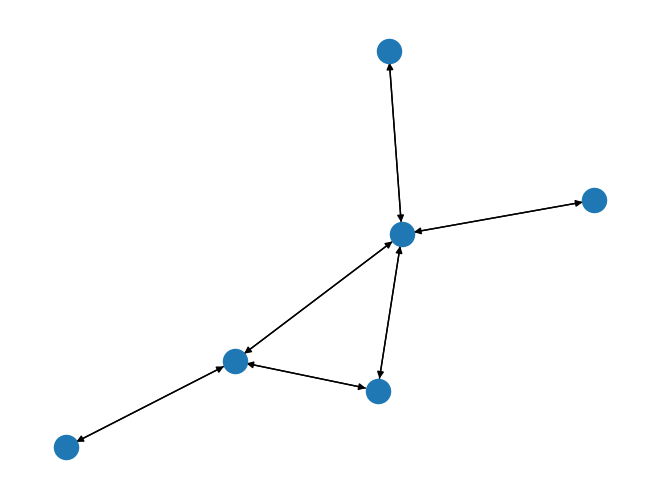

In [45]:
import networkx as nx
import numpy as np

G = nx.DiGraph(np.array(adjacency_matrix))
nx.draw(G) 

### Task 4

Create a new NetworkX graph and manually add nodes and edges, so that you end up with a full 3-ary tree of depth 2.

Afterwards, use the draw function to check, if it worked out.

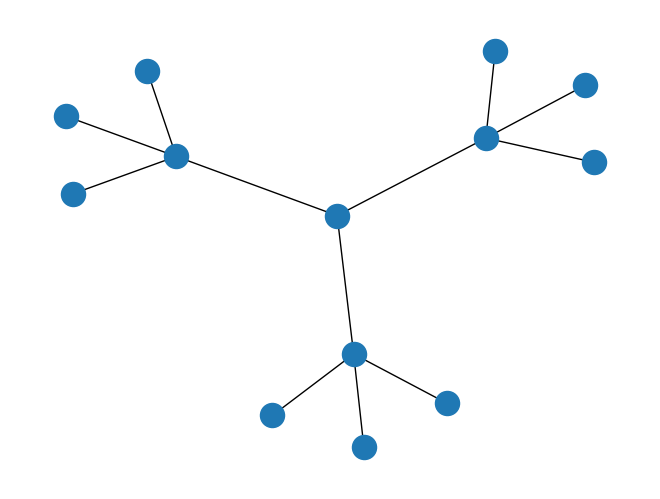

In [46]:
#Put your solution here.
from typing import Tuple
import networkx as nx
G = nx.Graph()

# A full 3-ary tree of depth 2 will have a root node (depth 0), from which 3 children will appear (depth 1) and each of those 
# children will have three children each once more (depth 2)

# Nodes is a list that will store each node (from the root through children, through grandchildren)
nodes: List[str] = [
    'root', 'child1', 'child2', 'child3', 
    'grandchild1', 'grandchild2', 'grandchild3', 
    'grandchild4', 'grandchild5', 'grandchild6', 
    'grandchild7', 'grandchild8', 'grandchild9'
]

# The edges array, which contains tuples, will create the edges (connections) between each of the nodes that need to have a connection
edges: List[Tuple[str]] = [
    ('root', 'child1'), ('root', 'child2'), 
    ('root', 'child3'), ('child1', 'grandchild1'), 
    ('child1', 'grandchild2'), ('child1', 'grandchild3'), 
    ('child2', 'grandchild4'), ('child2', 'grandchild5'), 
    ('child2', 'grandchild6'), ('child3', 'grandchild7'), 
    ('child3', 'grandchild8'), ('child3', 'grandchild9')
]

G.add_nodes_from(nodes)
G.add_edges_from(edges)

# Draw the graph
nx.draw(G)

### Final Task: Collect all the results

Fill in your student number in the variable and then run this cell (and all the cells above) to generate the text file that you have to hand in together with the notebook on canvas!

In [47]:
def exportToText(*args):
    with open(args[0], "w") as f:
        for argument in args:
            f.write("{}\n".format(argument))

exportToText("assignment1.txt",2824004, dict_graph_explanation, adj_graph_explanation, explain_binary)